# Applied Social Network Analysis in Python

## Chapter 2-3. Connected Components
* **[Lecture video](https://www.coursera.org/lecture/python-social-network-analysis/connected-components-wmvxd)**

<hr>

### Connected Graph

An undirected graph is **connected** if, for every pair nodes, there is a path between them.<br>
you can check a below line whether a graph is connected 
```python
nx.is_connected(G)
```
> out : True

True


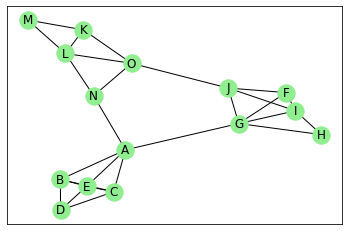

In [1]:
# Import NetworkX and set matplotlib enable to print in ipython notebook
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Define of Graph Class
G = nx.Graph()

# add edges into graph.
Edge_list = [
    ('A','B'),('A','C'),('A','E'),('B','E'),('B','D'),('B','C'),('C','E'),('C','D'),('D','E'),('A','G'),('A','N'),
    ('G','F'),('G','H'),('G','I'),('G','J'),('F','I'),('F','J'),('J','I'),('I','H'),('J','O'),
    ('O','N'),('L','N'),('O','L'),('O','K'),('L','K'),('M','K'),('L','M'),
]

for n1, n2, in Edge_list:
    G.add_edge(n1, n2)
    
# Frame layout setting
pos = nx.spring_layout(G, seed=201703) # Frame Layout setting to use

# Drawing
nx.draw_networkx(G, pos, node_color='lightgreen')
print(nx.is_connected(G))
plt.show()

However, if we remove edges `A-G`, `A-N`, and `J-O`, the graph becomes disconnected.<br>
There is no path between nodes in the three different "communities".

False


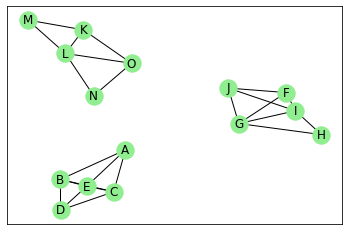

In [2]:
G.remove_edge('A','G')
G.remove_edge('A','N')
G.remove_edge('J','O')

print(nx.is_connected(G))
nx.draw_networkx(G, pos, node_color='lightgreen')
plt.show()

<hr>

### Connected Component 

A connected component is a subset of nodes such that there are two conditions this set of nodes satisfy.
1. Every node in the subset has a path to every other node.
2. No other node has a path to any node in the subset

> Is the subset {E,A,G,F} a connected component? > No!<br>Is the subset {N,O,K} a connected component? > YES!

Subset {N, O, K} is satisfied the first condition, but node L is connected to N, O and K. so the second condition is not satisfied.

You can use below function to find number of subsets graph.
```python
nx.number_connected_components(G)
```
> out : 3

You can also ask the actual subset component (which node belongs to) using :
```python
sorted(nx.connected_components(G))
```
> out : [{'D', 'A', 'E', 'C', 'B'}, {'F', 'G', 'H', 'I', 'J'}, {'L', 'O', 'K', 'N', 'M'}]

and You can request the subset that given nodes is included :
```python
nx.node_connected_component(G,'M')
```
> out : {'K', 'L', 'M', 'N', 'O'}

<hr>

### Connectivity in Directed Graph

* Strongly Connected : A directed graph is if, for every pair nodes $u$ and $v$, there is a directd path from $u$ to $v$ and a directed path from $v$ to $u$.
```python
nx.is_strongly_connected(G)
```
> out : False

* Weakly Connected : A directed graph is if replcaing all directed edges with undirected edges produces a connected undirected graph.
```python
nx.is_waekly_connected(G)
```
> out : True

strongly connected? : False
weakly connected? : True


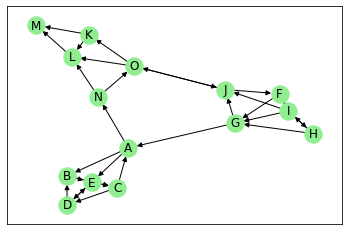

In [5]:
# Define of Directed Graph Class
G = nx.DiGraph()

# add edges into graph.
Edge_list = [
    ('A','B'),('A','E'),('A','N'),('B','C'),('B','E'),('C','A'),('C','D'),('D','B'),('D','E'),('E','D'),('E','C'),
    ('F','G'),('G','A'),('G','J'),('H','G'),('H','I'),('I','H'),('I','G'),('I','J'),('I','F'),('J','F'),('J','O'),
    ('N','O'),('N','L'),('O','J'),('O','K'),('O','L'),('K','L'),('K','M'),('L','M'),
]
for n1, n2, in Edge_list:
    G.add_edge(n1, n2)
    
nx.draw_networkx(G, pos, node_color='lightgreen')
# It will return "False" because of absence of the path A to H.
print(f'strongly connected? : {nx.is_strongly_connected(G)}')
# It will return "True", beacuse this function consider given graph as undirected.
print(f'weakly connected? : {nx.is_weakly_connected(G)}')
plt.show()

#### Strongly connected components
A strongly connected component is a subset of nodes such that there are two conditions this set of nodes satisfy.
1. Every node in the subset has directed path to every other node
2. No other node has a directed path to and from every node in the subset

What are the strongly connected components in this graph?
```python
sorted(nx.strongly_connected_components(G))
```
> out : [{'M'}, {'L'}, {'K'}, {'A', 'D', 'C', 'O', 'G', 'F', 'N', 'J', 'E', 'B'}, {'I', 'H'}]

#### Weakly connected components

The connected components of the graph after replacing all directed edges with undirected edges.

```python
sorted(nx.weakly_connected_components(G))
```
> out : [{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'}]

Since the graph is weakly connected it only has one weakly connected component.